In [19]:
import sys
import numpy as np
import matplotlib
import pandas
import sklearn 


In [5]:
from sklearn import preprocessing,cross_validation
from sklearn.neighbors import KNeigbhorsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

ImportError: cannot import name 'KNeigbhorsClassifier' from 'sklearn.neighbors' (C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neighbors\__init__.py)

In [6]:
pip uninstall sklearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.  Downloading sklearn-0.0.tar.gz (1.1 kB)

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=1ae297a2153324789ff291350a41f87844fd6a3c334a26311bce2e0ff93f1da7
  Stored in directory: c:\users\ankit\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [3]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#loading given dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
#dataframe
df=pd.read_csv(url,names=names)

In [5]:
#first preprocess the data we have and visualize to understand the data better & see which will give us better results
#missing data to set to -9999 so that python will ignore that unnecessary data
df.replace('?',-9999,inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [6]:
#print the shape of the dataset
print(df.shape)

(699, 11)


In [7]:
#drop id since it is irrelevant
df.drop(['id'],1,inplace=True)

In [9]:
print(df.axes)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [10]:
#visualize dataset
#first point
print(df.loc[0])

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object


In [12]:
#since we have 699 cells
print(df.loc[698])

clump_thickness            4
uniform_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
single_epithelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object


In [13]:
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


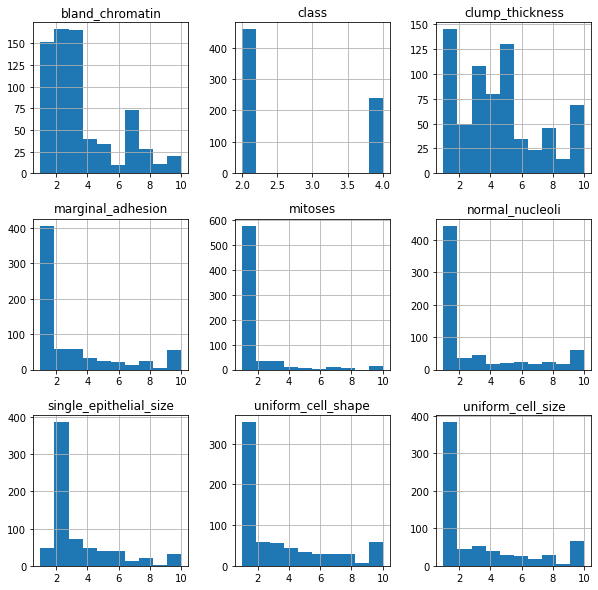

In [14]:
#visualization
#plot histogram for each variable
#shows histogram of each feature
df.hist(figsize=(10,10))
plt.show()

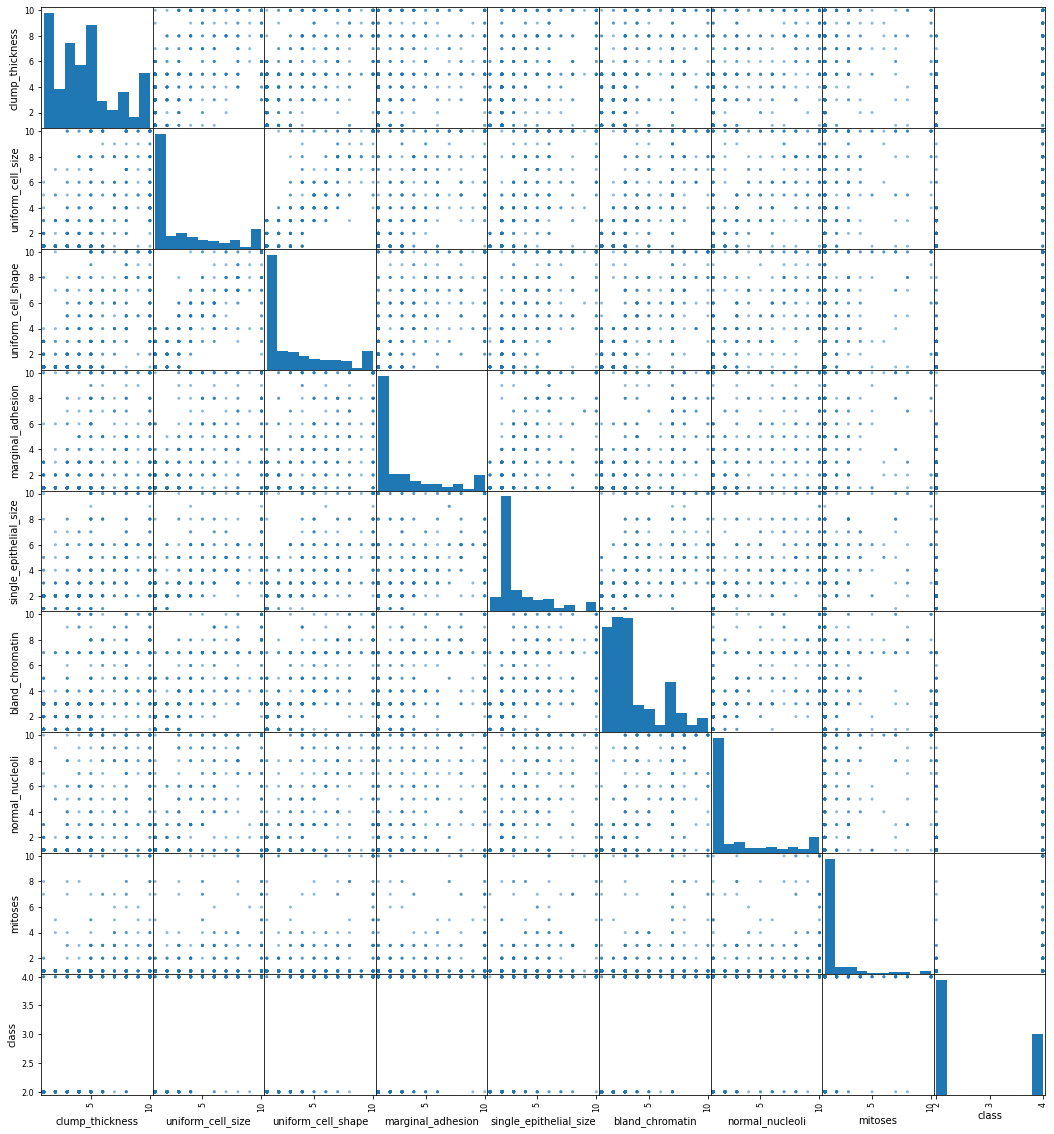

In [16]:
#scatter plot matrix
scatter_matrix(df,figsize=(18,20))
plt.show()

In [17]:
#above not many linear relationships except for uniform_cell_shape

In [23]:
#ML 
#Create X and Y datasets fro training
#X is going to be everything but the class column
X = np.array(df.drop(['class'],1))
#Y is going to be class column
Y = np.array(df['class'])
#class is benign or malignant classification
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.2)

In [35]:
#specify the training options
#instead of random results specifying the seed will help stay consistent
seed = 8
scoring='accuracy'

In [36]:
#defining models to train
models=[]
#KNN & SVM Models
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))
# Now to evaluate each model in turn
results=[] #list
names=[]#to print some info at the end

#for loop
for name ,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    #append the resukts and print
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)"% (name,cv_results.mean(),cv_results.std())
    print(msg)

KNN : 0.971396 (0.018192)
SVM : 0.660000 (0.060962)


C:\Users\ankit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\ankit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
#this shows that KNN is much more efficient when in random

In [37]:
#make predictions on our validation dataset
for name, model in models:
    model.fit(X_train,Y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test,predictions))
    print(classification_report(Y_test,predictions))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        89
           4       0.94      0.98      0.96        51

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.6357142857142857
              precision    recall  f1-score   support

           2       0.64      1.00      0.78        89
           4       0.00      0.00      0.00        51

    accuracy                           0.64       140
   macro avg       0.32      0.50      0.39       140
weighted avg       0.40      0.64      0.49       140



C:\Users\ankit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
clf = SVC()

clf.fit(X_train,Y_train)
accuracy = clf.score(X_test, Y_test)
print(accuracy)

#examples to get the desired type of data

example_measures = np.array([[4,2,1,1,1,2,3,2,5]])

#to get a column vector
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)


0.6357142857142857
[2]
